# Clustering Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,SpectralClustering,AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram
import requests
import urllib

In [2]:
from scipy.io import matlab
mpl.rcParams.update({'font.size':16})

![waveform](http://github.com/rgerkin/neuro-data-analysis-course/raw/master/images/extracellular-waveform.png)

In [3]:
url = 'https://github.com/rgerkin/neuro-data-analysis-course/raw/master/data/C_Easy1_noise01_short.mat'  
urllib.request.urlretrieve(url, 'data/recording.mat');

In [4]:
data = matlab.loadmat('data/recording.mat')
spike_times = data['spike_times'][0][0][0]
voltage = data['data'][0]
dt = data['samplingInterval'][0][0]/1000
times = np.arange(0,dt*len(voltage),dt)

## Action potential (spike) waveforms are visible at high frequencies

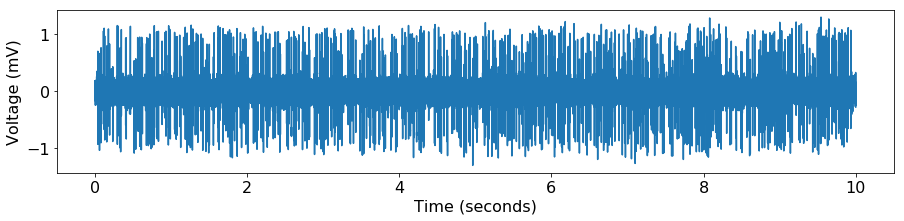

In [5]:
plt.figure(figsize=(15,3))
plt.plot(times,voltage)
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (mV)');

## Zoom in...

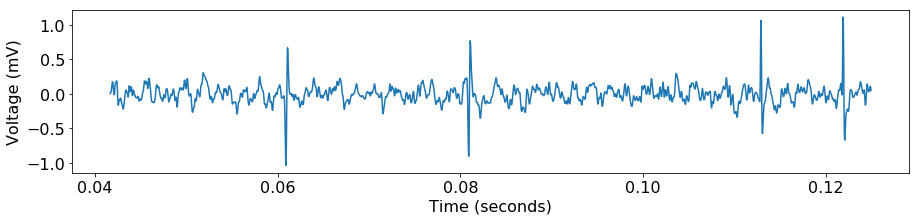

In [6]:
plt.figure(figsize=(15,3))
plt.plot(times[1000:3000],voltage[1000:3000])
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (mV)');

In [7]:
n_spikes = len(spike_times)
n_samples = 75
times_short = np.arange(0,n_samples*dt*1000,dt*1000)
spike_waveforms = np.empty((n_samples,n_spikes))
for i in range(n_spikes):
    t = spike_times[i]
    spike_waveforms[:,i] = voltage[t:t+n_samples]

## Overlay all the spikes

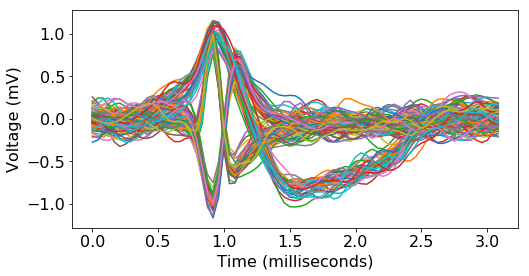

In [8]:
plt.figure(figsize=(8,4))
for i in range(100):
    plt.plot(times_short,spike_waveforms[:,i])
plt.xlabel('Time (milliseconds)')
plt.ylabel('Voltage (mV)');

## What makes some spikes different from others?

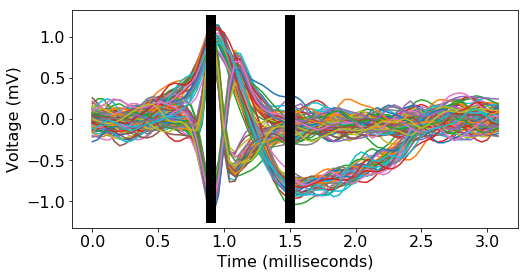

In [9]:
plt.figure(figsize=(8,4))
for i in range(100):
    plt.plot(times_short,spike_waveforms[:,i])
t1 = 0.9
t2 = 1.5
plt.plot([t1,t1],[-1.2,1.2],color='black',linewidth=10)
plt.plot([t2,t2],[-1.2,1.2],color='black',linewidth=10)
plt.xlabel('Time (milliseconds)')
plt.ylabel('Voltage (mV)');

## Plot the voltage at t2 vs the voltage at t1 to separate the spikes

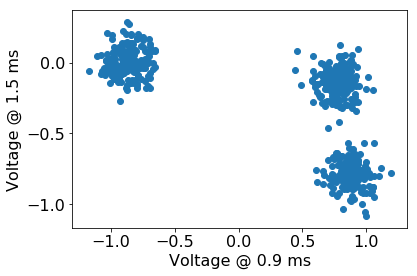

In [10]:
v_09 = spike_waveforms[21,:]
v_15 = spike_waveforms[36,:]
plt.scatter(v_09,v_15)
plt.xlabel('Voltage @ 0.9 ms')
plt.ylabel('Voltage @ 1.5 ms');

## Call the voltages at each of those two times the "features"

### Now each spike waveform will have only two features instead of a whole bunch of a whole series of voltages over time

In [11]:
features = np.vstack((v_09,v_15)).T

## Cluster using only those features

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
kmeans.labels_

array([1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0,
       0, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 2,
       1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 1, 0, 0, 2,
       1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 0,
       2, 0, 0, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1,
       0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 1, 0, 2,
       0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0,

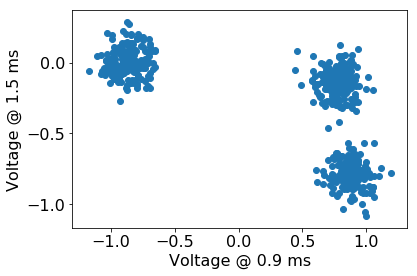

In [14]:
plt.scatter(v_09,v_15)
plt.xlabel('Voltage @ 0.9 ms')
plt.ylabel('Voltage @ 1.5 ms');

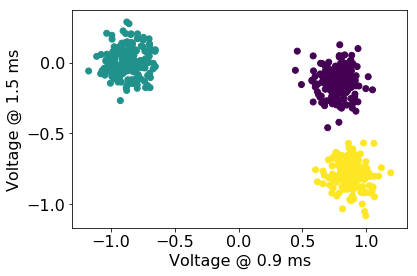

In [15]:
plt.scatter(v_09,v_15,c=kmeans.labels_)
plt.xlabel('Voltage @ 0.9 ms')
plt.ylabel('Voltage @ 1.5 ms');

## The algorithm needs us to tell it how many clusters there are.  What if we pick a different number?  

## 2 clusters:

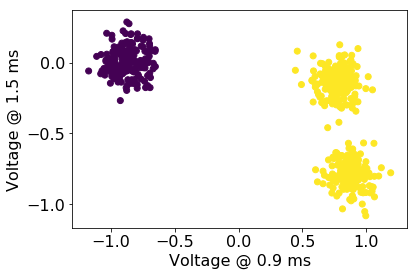

In [16]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(features)
plt.scatter(v_09,v_15,c=kmeans.labels_)
plt.xlabel('Voltage @ 0.9 ms')
plt.ylabel('Voltage @ 1.5 ms');

## 4 clusters

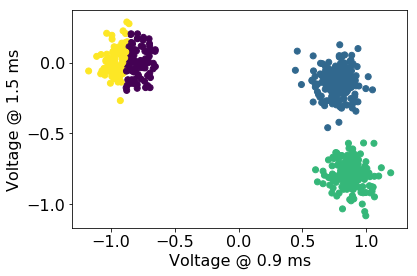

In [17]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(features)
plt.scatter(v_09,v_15,c=kmeans.labels_)
plt.xlabel('Voltage @ 0.9 ms')
plt.ylabel('Voltage @ 1.5 ms');

## Other options for clustering

![clustering-algorithms](https://raw.githubusercontent.com/rgerkin/neuro-data-analysis-course/master/images/sphx_glr_plot_cluster_comparison_0011.png)

## How can we decide how many clusters to choose? 
## How will the data cluster depending on that choice?  

In [18]:
def my_dendrogram(features,color_threshold,truncate_mode=None,labels=None,no_labels=False,leaf_font_size=14):
    plt.figure(figsize=(17,7))
    Z = linkage(features,method='ward')
    Z[:,2] = Z[:,2]**0.25 # Warp distance for visualization purposes
    dendrogram(
        Z,
        truncate_mode=truncate_mode,  # show only the last p merged clusters
        p=25,  # show only the last p merged clusters
        color_threshold=color_threshold,
        above_threshold_color='black',
        leaf_font_size=leaf_font_size,
        labels=labels,
        no_labels=no_labels,
    );
    plt.ylabel('Intercluster distance')
    if not no_labels:
        plt.xlabel('Cluster sizes');

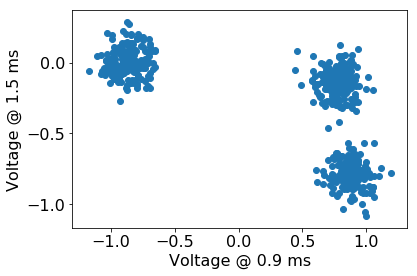

In [19]:
plt.scatter(v_09,v_15)
plt.xlabel('Voltage @ 0.9 ms')
plt.ylabel('Voltage @ 1.5 ms');

# The Dendrogram

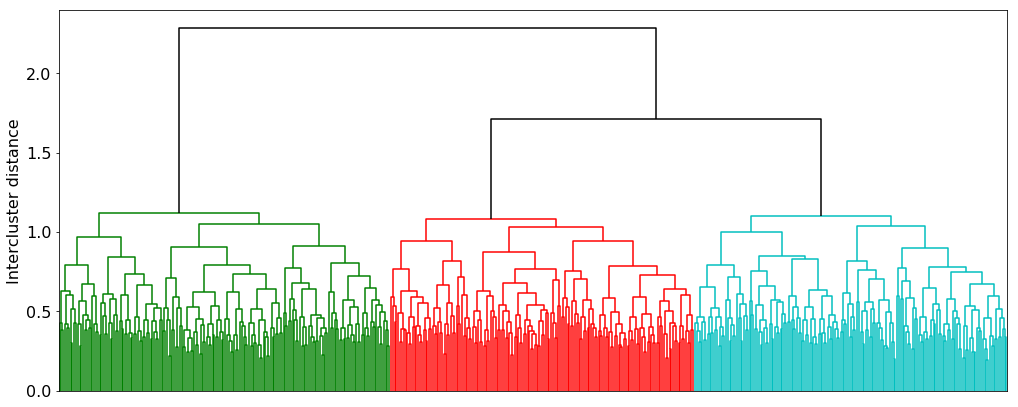

In [20]:
my_dendrogram(features,1.2,no_labels=True)

## Ignore the smallest "branches":

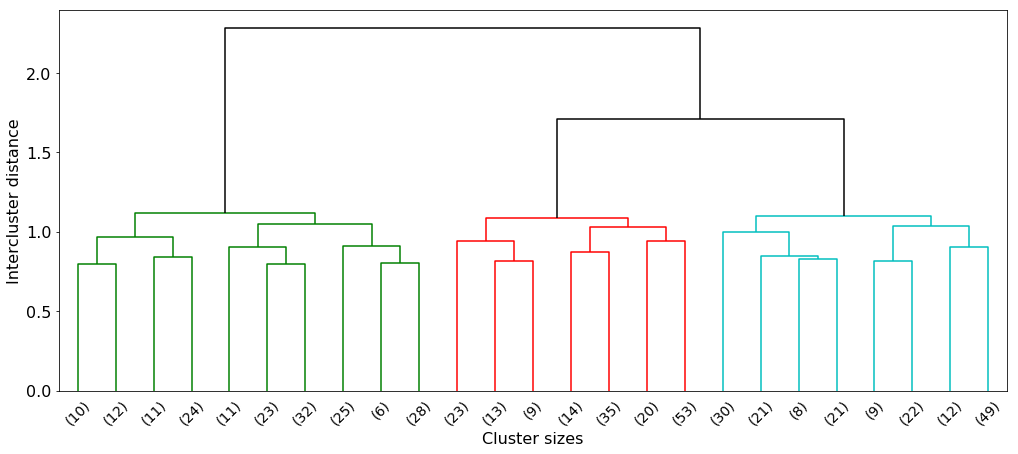

In [21]:
my_dendrogram(features,1.2,truncate_mode='lastp')

## Recolor using a larger inter-cluster distance cutoff for clustering

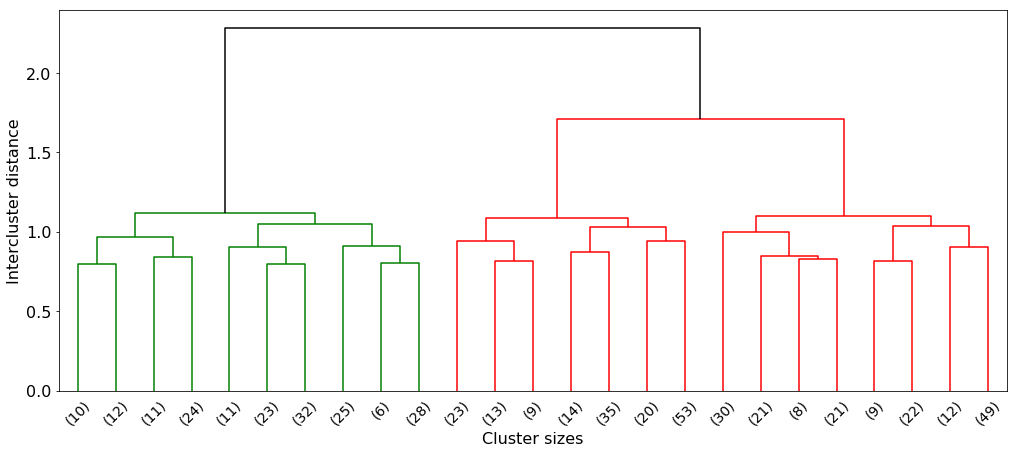

In [22]:
my_dendrogram(features,2,truncate_mode='lastp')

## Recolor using a smaller inter-cluster distance cutoff for clustering

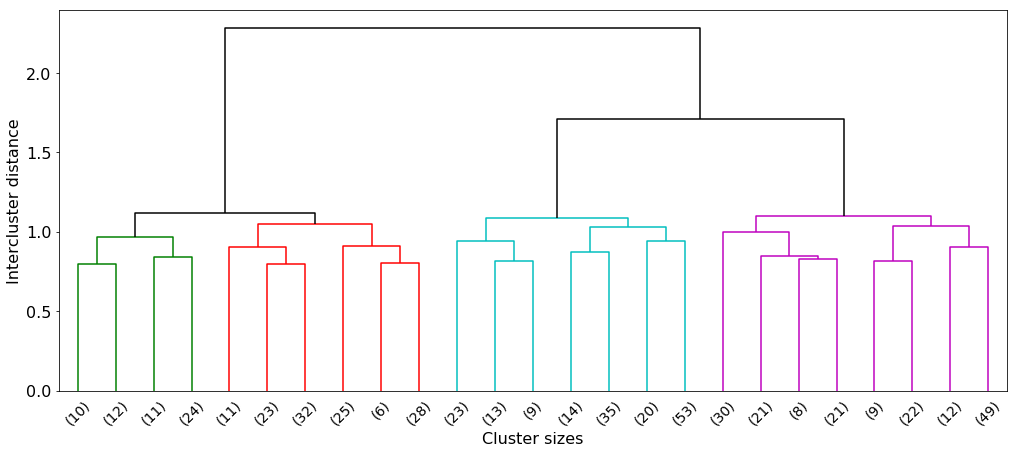

In [23]:
my_dendrogram(features,1.12,truncate_mode='lastp')

## Using PCA to visualize your clusters

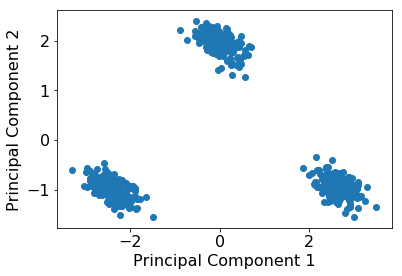

In [24]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(spike_waveforms.T)
plt.scatter(pca_features[:,0],pca_features[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

## Are the first two principal components sufficient for clustering?

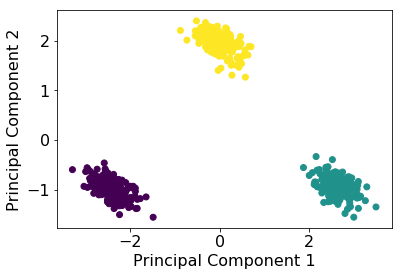

In [25]:
kmeans = KMeans(n_clusters=3)
n_components = 3
kmeans.fit(pca_features)
plt.scatter(pca_features[:,0],pca_features[:,1],c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

## Yes! This means we don't have to identify features manually (in most cases)

## We don't even need to do PCA in order to cluster (only to visualize the results)

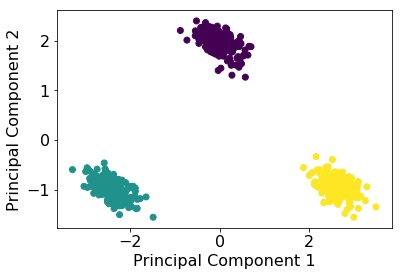

In [26]:
kmeans.fit(spike_waveforms.T)
plt.scatter(pca_features[:,0],pca_features[:,1],c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

## Revisiting the gene expression data

In [28]:
df = pd.read_csv('http://github.com/rgerkin/neuro-data-analysis-course/raw/master/data/rnaseq_donor9861/RNAseqTPM.csv',
                 header=None,index_col=0)
df.index.name = 'gene'
df = df.loc[df.sum(axis=1)>0] # Only keep genes expressed in the brain
annotation = pd.read_csv('http://github.com/rgerkin/neuro-data-analysis-course/raw/master/data/rnaseq_donor9861/SampleAnnot.csv')
df.columns = annotation['sub_structure']
df.head()

sub_structure,SPL,SPL,SPL,AnG-s,SFG-l,OrbGyri,GRe,OrbGyri,OrbGyri,GRe,...,CbCx,CbCx,CbCx,CbCx,Caudate,Putamen,Putamen,GP,GP,Caudate
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,3.161960e-06,3.258536e-06,2.641817e-06,3.108662e-06,4.039857e-06,4.333618e-06,4.025451e-06,2.974454e-06,1.881650e-06,4.345292e-06,...,3.453082e-06,4.187005e-06,4.811023e-06,4.161573e-06,6.538805e-06,0.000004,1.079617e-05,5.867319e-06,1.046644e-05,5.198772e-06
A1BG-AS1,5.178069e-06,4.948610e-06,4.238131e-06,4.075050e-06,4.467568e-06,1.745767e-06,5.223524e-06,3.281134e-06,2.337282e-06,3.452217e-06,...,7.639799e-06,5.353240e-06,6.806401e-06,6.018209e-06,2.411404e-06,0.000003,1.581258e-06,9.329990e-07,5.893017e-07,9.203809e-07
A1CF,3.544914e-08,2.427387e-08,6.535814e-08,1.612159e-08,5.255629e-08,2.913073e-08,1.196508e-08,0.000000e+00,0.000000e+00,2.335678e-08,...,1.641368e-07,1.283257e-07,1.290715e-07,1.440339e-07,4.432816e-08,0.000000,1.742187e-08,4.132652e-08,9.118127e-09,1.952420e-08
A2LD1,1.088394e-06,1.922628e-06,1.952536e-06,1.408353e-06,1.463647e-06,1.854015e-06,1.664973e-06,8.527213e-07,7.791031e-07,1.287892e-06,...,1.816362e-06,1.454675e-06,1.491791e-06,8.507376e-07,2.084369e-06,0.000002,2.587033e-06,2.571861e-06,1.962172e-06,2.477960e-06
A2M,4.272174e-05,5.538482e-05,6.106004e-05,3.081461e-05,6.707973e-05,6.928951e-05,5.553703e-05,6.921014e-05,7.029073e-05,6.541462e-05,...,6.027224e-05,7.676719e-05,5.149413e-05,6.032053e-05,1.455172e-04,0.000114,1.114684e-04,1.120086e-04,9.890017e-05,1.590071e-04


In [29]:
# A function for summarizing covariancs and correlations
def summarize(info,name,quiet=False):
    values = info[name]
    if not quiet:
        print(values.round(2))
    plt.pcolor(values,cmap='RdBu_r',vmin=-values.max(),vmax=values.max())
    raynge = np.arange(values.shape[0])
    if not quiet:
        plt.xticks(raynge+0.5,raynge)
        plt.yticks(raynge+0.5,raynge)
    else:
        plt.xticks([])
        plt.yticks([])
    plt.gca().invert_yaxis() # Make y-axis go from low to high like a matrix
    plt.colorbar().set_label(name)
    eigenvalues,_ = np.linalg.eig(info[name])
    if not quiet:
        for i,eig in enumerate(sorted(eigenvalues,reverse=True)):
            print('Eigenvalue #%d is %.3g' % (i+1,eig))
            
info = {}

## The ugly correlation matrix from before :(

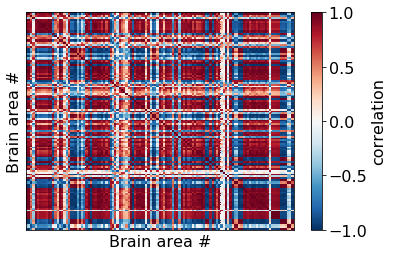

In [30]:
df_mean_subtracted = df.sub(df.mean(axis=1),axis=0)
info['correlation'] = df_mean_subtracted.corr().values
summarize(info,'correlation',quiet=True)
plt.xlabel('Brain area #')
plt.ylabel('Brain area #');

## Clustering brain areas by what genes they express

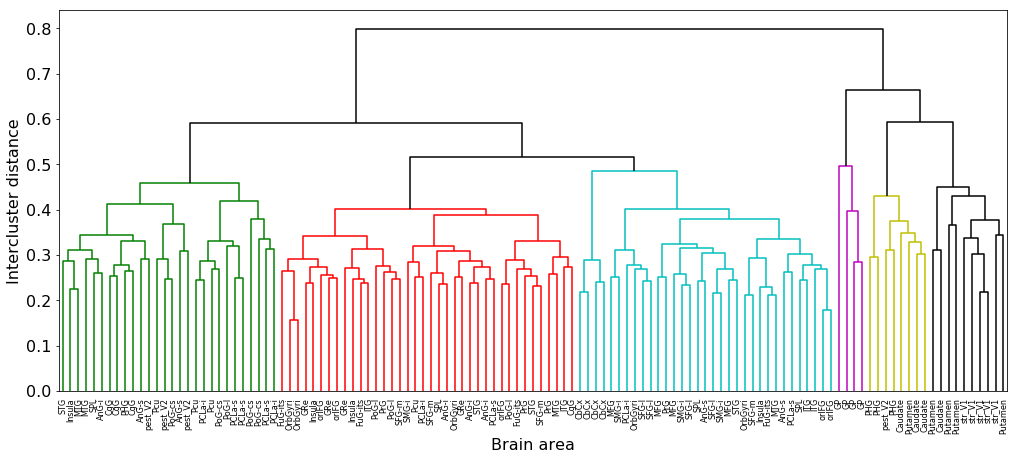

In [31]:
my_dendrogram(df_mean_subtracted.T,0.5,labels=df.columns,leaf_font_size=8)
plt.xlabel('Brain area');

In [32]:
import seaborn as sns
sns.set()

## Combining dendrograms and the correlation matrix together

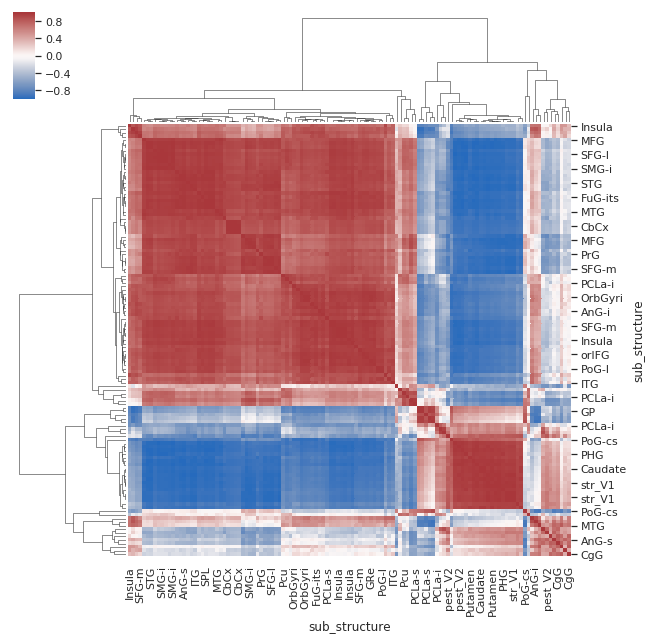

In [33]:
sns.clustermap(df_mean_subtracted.corr(),cmap='vlag',vmin=-1,vmax=1);

## Visualizing gene clusters using the same technique

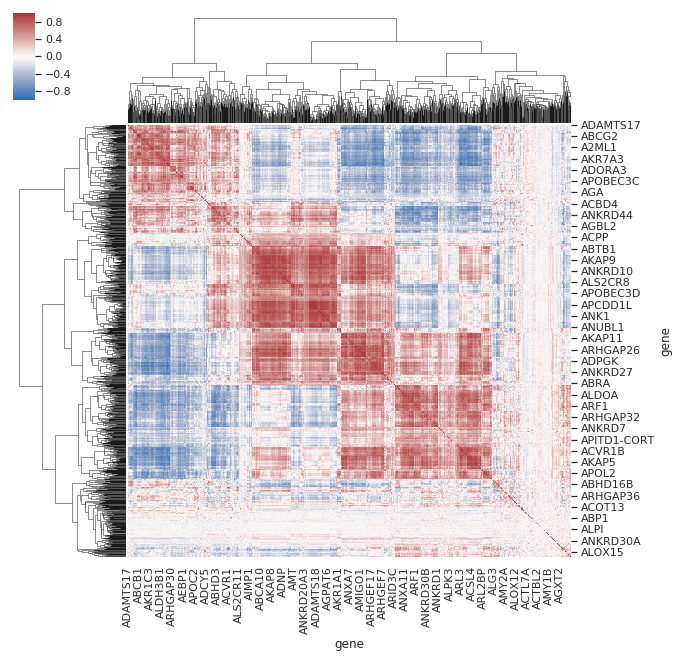

In [34]:
sns.clustermap(df.iloc[:1000,:].T.corr(),cmap='vlag',vmin=-1,vmax=1);

## Basketball!

In [35]:
df = pd.read_csv('https://github.com/rgerkin/neuro-data-analysis-course/raw/master/data/basketball.csv')
df['Player'] = df['Player'].map(lambda x:x.split('\\')[0])
df = df.drop(['Rk','Tm','Age'],axis=1).set_index(['Player','Pos']).fillna(0)
df = df.div(df['MP'],axis=0)[df['MP']>30][['PS/G','TRB','AST','STL','BLK','3P']]
df.sort_values('PS/G',ascending=False).head()

,,PS/G,TRB,AST,STL,BLK,3P
Player,Pos,,,,,,
James Harden,SG,0.877095,0.145251,0.248603,0.050279,0.019553,0.114525
Stephen Curry,PG,0.814024,0.161585,0.198171,0.048780,0.003049,0.128049
Anthony Davis,PF,0.768392,0.299728,0.065395,0.038147,0.059946,0.021798
Joel Embiid,C,0.761146,0.356688,0.098726,0.022293,0.057325,0.031847
Kyrie Irving,PG,0.757669,0.113497,0.156442,0.033742,0.009202,0.085890


## Do similar basketball players (rows) cluster together?
## Do similar statistics (columns) cluster together?

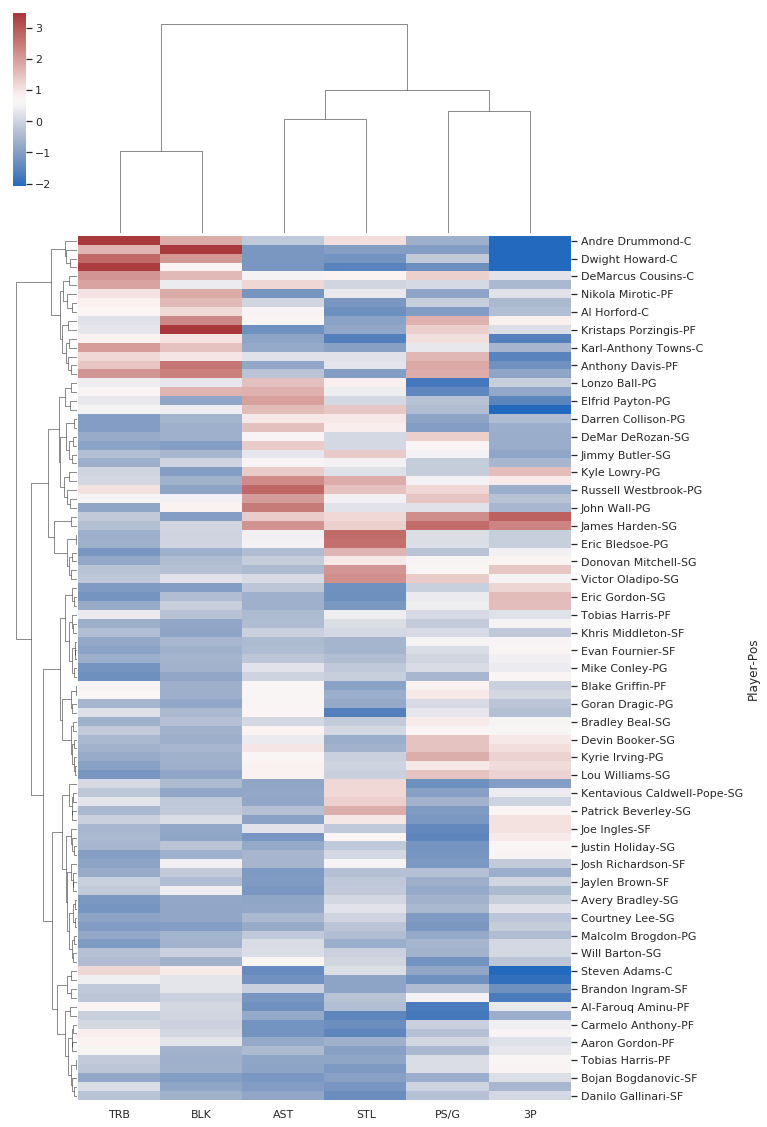

In [36]:
sns.clustermap(df,z_score=1,method='ward',cmap='vlag',figsize=(10,20));